<a href="https://colab.research.google.com/github/Sharon972/me/blob/Data_science_cursillo_july/02_analisis_exploratorio_seaborn_numpy_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib.pyplot
%matplotlib inline

## ¿Cómo crear gráficos con pandas?

04_plot_overview.svg

Vamos a usar los datos de calidad de aire $NO_2$, disponibilizado por [OpenAQ](https://openaq.org/). El conjunto de datos `air_quality_no2.csv` provee los valores $NO_2$ de las mediciones de las estaciones *FR04014*, *BETR801*, y *London Westminster* en París, Antwerp y Londres respectivamente

In [ ]:
air_quality_url = "https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_no2.csv"

air_quality = pd.read_csv(air_quality_url, index_col=0, parse_dates=True)#leo csv (pase_dates (interpreta los datos de fechas y lo interpreta como tipo date))

air_quality.head()#vemos los

#el cuadro me da datos acompañados de tiempo asi que es una serie temporal

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


> ℹ️ Nota: Usamos los parámetros `index_col` y
 `parse_dates` en la función `read_csv` para definir la primera columna (Nº 0) como índice del `DataFrame` resultante y convertimos esta columna en objetos `Timestamp`.

↘️ **Quiero visualizar rápidamente los datos**

<Axes: xlabel='datetime'>

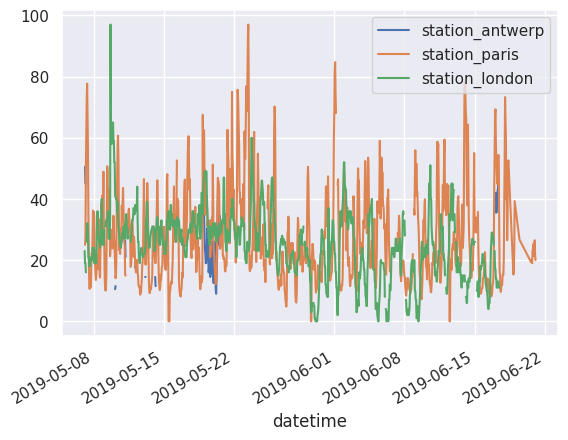

In [ ]:
air_quality.plot()#me grafica en relacion con el tiempo, el eje x me lo elige como serie de tiempo

> Con un `DataFrame`, pandas crea automáticamente un gráfico de líneas por cada columna con datos **númericos**

↘️ **Quiero graficar solamente la colunna de la tabla de datos con los datos de París**

<Axes: xlabel='datetime'>

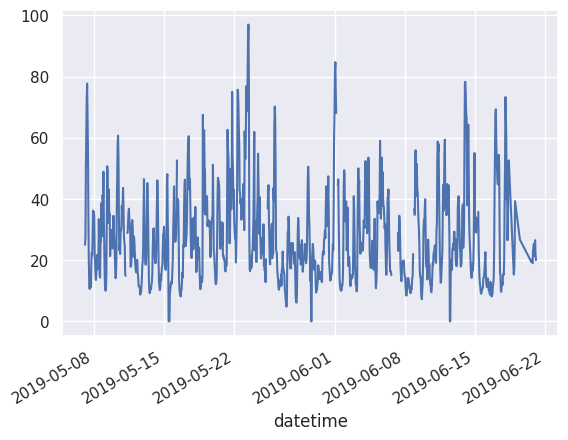

In [ ]:
air_quality["station_paris"].plot() #selecciono una columna y vemos el metodo plot y me genera el grafico de solo esa columna en realcion al tiempo

> Para graficar una columna específica, usamos el método de selección en combinación con el método `plot()`. Por lo que `.plot()` funciona para las Series y DataFrame

↘️ **Quiero comparar visualmente los valores $NO_2$ medidos de Londres contra los de París**

<Axes: xlabel='station_london', ylabel='station_paris'>

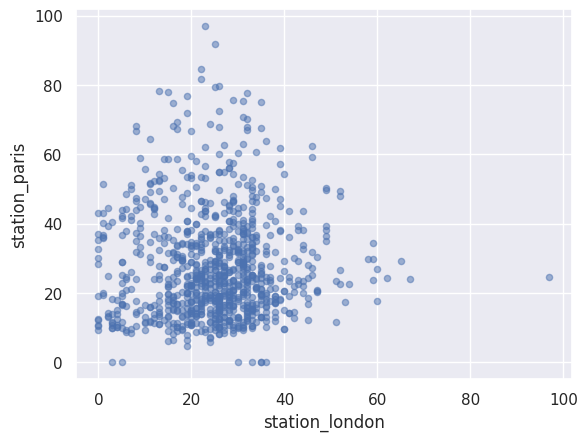

In [ ]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)# grafico de dispersión , x sera la estacion de londres e Y ( será paris)y vemos como los datos de la columna londres con paris se relacionan

A parte del gráfico de líneas por defecto de la función plot, un número de alternativas estan disponibles para graficar datos.

Vamos a usar un poco de Python para ver que métodos hay disponibles:

In [ ]:
[
    method_name
    for method_name in dir(air_quality.plot)  #
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

Podemos si estamos en Google Colab o Jupyter Notebook, escribir `air_quality.plot.` y ver las opciones

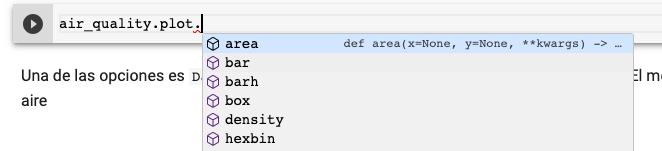

In [ ]:
# Escribe la siguiente línea sin el #
#air_quality.plot.   ( asi me carga todos los metodos despues del punto)

Una de las opciones es `DataFrame.plot.box()`, que se refiere a un [diagrama de cajas](https://es.wikipedia.org/wiki/Diagrama_de_caja). El método `box` es apicable en los datos de calidad de aire

<Axes: >

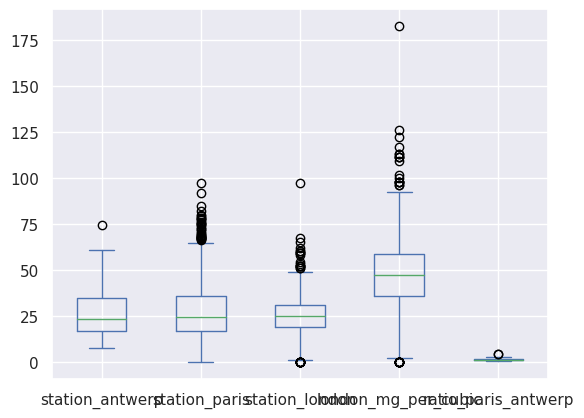

In [ ]:
air_quality.plot.box() #diagram de caja, para representar valores mayores y menores de nuestros datos

↘️ **Quiero a cada columna en un subgráfico separado**

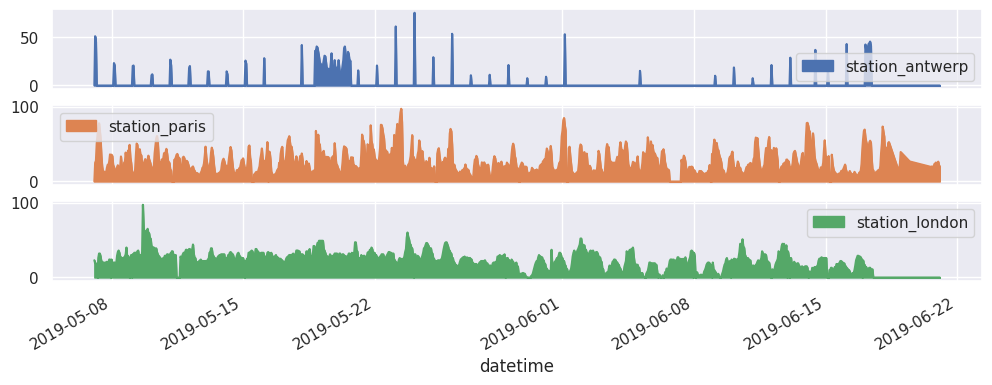

In [ ]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True) #si separamos cada columana en un subgrafico o un subdiagrama

Los gráficos separados por cada columna de dato se puede lograr con el argumento `subplots` de las funciones `plot`

> 🔗 Para más opciones de formateo, puedes revisar la sección de [plot formatting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-formatting) del guía de usuario de pandas

↘️ **Quiero personalizar aún más, extender o guardar el gráfico resultante**

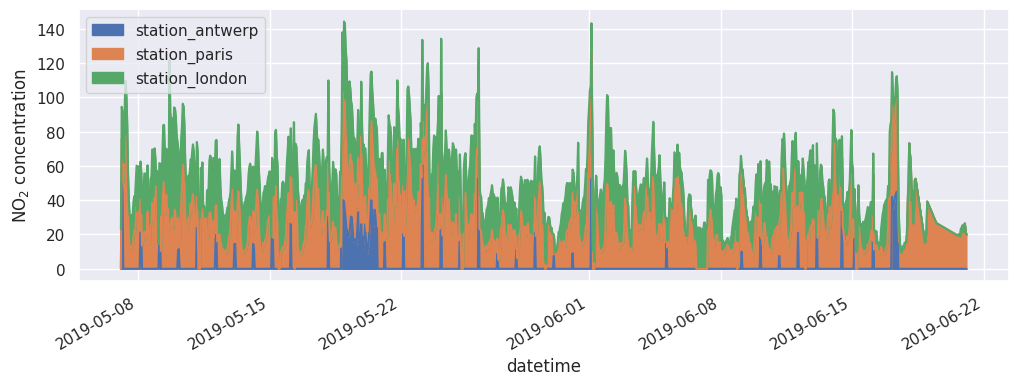

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.plot.area(ax=axs)

axs.set_ylabel("NO$_2$ concentration")#para personañlizar eje y

fig.savefig("no2_concentrations.png")

> 🤗 Puedes ver más información sobre los gráficos en la guía de [visualización](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) de pandas

## Como crear nuevas columnas derivadas de las columnas existentes

05_newcolumn_1.svg

↘️ **Quiero expresar la concentración $NO_2$ de la estación de Londres en $mg/m^3$**

*(Sí asumimos que la temperatura es 25 grados celsius y la presión es 1013 hPa, el factor de conversión es $1.882$)*

In [ ]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
#elijo los datos de la columna londres por el factor de conversión y le asignamos a una nueva columna
#que asigno como london_mg_per_cubic
air_quality

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN


Para crear la nueva columna, usamos los corchetes de selección con el nombre de una nueva columna en la parte izquierda de la asignación

> ℹ️ Nota: El cálculo de los valores esta hecho **element-wise**, es decir, elemento por elemento. Esto significa que todos los valores dados en la columna son múltiplicados por el valor 1.882 de una sola vez. No es necesario usar un ciclo `for` para iterar en las filas.

05_newcolumn_2.svg

↘️ **Quiero saber el ratio entre los valores en París versus los de Antwerp y guardar los resultados en una nueva columna**

In [ ]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
#divido la columna station paris entre la columna de station_antwerp, la divsion se hace dato x dato.
#Y le asigna a una nueva columna

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


Los cálculos estan hechos de nuevo elemento por elemento, por lo que la operación `/` se aplica a los valores por cada fila.

Si necesitas lógica más avanzada, puedes utilizar código de Python arbitrario con la función `apply()`

Quiero renombrar las columnas a los identificadores correspondientes que utiliza OpenAQ

In [ ]:
# .inserts (con esto puedo cambiar de posicion a mi columna)
#Si queres solo cambiar el orden sin insertar nuevas columnas,
#podes seleccionar en el orden que queres dataframe[["col2", "col1", "col4", "col3"]]

In [ ]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)#con esto renombro las columnas con VARIABLE.rename(le agregamos un diccionario(como se llamaba: nuevo nombre))

In [ ]:
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


> La función `rename()` puede ser usada para las filas y las columnas. Solo hay que proveer un diccionario con las claves de los nombres actuales y los valores de los nuevos nombres a actualizar.

La conversión no solo se restringe a nombres fijos, sino que también podemos usar funciones de mapeo.

Por ejemplo, convertir todas los nombres de columnas a mínusculas se puede lograr utilizando una función:

In [ ]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
#convierto columnas a minusculas con esa funcion
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


> ℹ️ Detalles sobre el renombrado de las filas y las columnas se pueden encontrar en el guía de [renombrando etiquetas](https://pandas.pydata.org/docs/user_guide/basics.html#basics-rename) de pandas

## Resumen Estadístico

In [ ]:
titanic_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
titanic = pd.read_csv(titanic_url)
titanic.head() #Usamos el dataset de titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Estadísticas Agregadas

06_aggregate.svg

**Ejemplo: ¿Cuál es la edad promedio de los pasajeros del Titanic?**

In [ ]:
edad_promedio = titanic["Age"].mean() #le agrego un metodo como mean(promedio)
print(f"La edad promedio es: {edad_promedio}")#printeo

La edad promedio es: 29.69911764705882


Diferentes estadísticas están disponibles en pandas y pueden ser aplicadas a las columnas con datos númericos. Las operaciones en general excluyen datos faltantes y operan a través de las filas por defecto.

06_reduction.svg

**Ejemplo: ¿Cuál es la mediana de la edad y el costo de ticket (ticket fare price) de los pasajeros del Titanic?**

In [ ]:
medianas = titanic[["Age", "Fare"]].median()#hace la agregacion en reñacion a cada columna Age y Fare
medianas

Age     28.0000
Fare    14.4542
dtype: float64

La estadística aplicada a multiples columnas de un DataFrame es calculado por cada columna númerica

Las estadísticas pueden ser cálculadas para multíples columnas al mismo tiempo. Te acuerdas de la función `.describe()`?



In [ ]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


En vez de utilizar estadísticas predefinidas, se pueden utilizar combinaciones específicas de estadísticas de agregación para ciertas columnas con el método `.agg()`:

In [ ]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)#Hago agregaciones. por cada dato en cada columna Age O Fare agrega los metodos min, max, median mean o skew
#y me retorna un nuevo dataframe

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


## Estadísticas de Agregación agrupadas por categoría

06_groupby.svg

**Ejemplo: ¿Cuál es la edad promedio para los pasajeros hombres versus mujeres?**

In [ ]:
titanic[["Sex", "Age"]].groupby("Sex").mean()#agrupo segun lo que se le asigne a groupby en este caso sex (male y female) con eso
#agrupa todos los años usando mean

,Age
Sex,
female,27.915709
male,30.726645


Como nuestro ínteres es la edad promedio para cada género, se hace primero una sub selección de las dos columnas: `[["Sex", "Age"]]` . Luego, el método `.groupby()` es aplicado sobre la columna *Sex* para crear un grupo por categoría. La edad promedio por cada género es calculado y retornado.

Calculando una estadística dada (e.j. la edad promedio) para cada categoría en una columna (e.j. hombre/mujer en la columna sexo) es un patrón muy común. El método `groupby` es utilizado para utilizar este tipo de operaciones. Esto encaja en el patrón más general llamado *split-apply-combine*:

*   Dividir los datos en grupos
*   Aplicar una función a cada grupo de manera independiente
*   Combinar los resultados en una estructura de datos

Los pasos de aplicar una función y combinar son típicamente hechos juntos por pandas.

En el ejemplo anterior, nosotros seleccionamos las dos columnas primero. Si no, el método `mean` es aplicado a cada columna conteniendo datos númericos pasando el argumento `numeric_only = True`:



In [ ]:
titanic.groupby("Sex").mean(numeric_only=True)#de sex usa male y female y solo bota los que son numericos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


No tiene mucho sentido obtener el promedio del valor de *Pclass*. Sí solo estamos interesados en la edad promedio de cada género, la selección de columnas (corchetes rectanguares \[\]) son soportados en los datos agrupados también:

In [ ]:
titanic.groupby("Sex")["Age"].mean()#agrupamos por sexo y a la columna edades le calculamos promedio

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

06_groupby_select_detail.svg

<div class="admonition note">
<p><b>Nota</b></p>
<p>La columna <code class="docutils literal notranslate"><span class="pre">Pclass</span></code> contiene datos númericos pero en realidad representa 3 categorias (o factores) con las respectivas etiquetas ‘1’,
‘2’ and ‘3’. Calcular estadísticas sobre estas no tiene sentido.
Para eso, pandas provee un tipo de datos <code class="docutils literal notranslate"><span class="pre">Categorical</span></code> que se encarga de esto


Más información sobre
<a class="reference internal" href="https://pandas.pydata.org/docs/user_guide/categorical.html#categorical"><span class="std std-ref">Categorical data</span></a></p>
</div>

**Ejemplo: ¿Cuál es el precio promedio (fare) por cada combinación de sexo y clase de cabina?**

In [ ]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()#agrupamos por 2 columnas por sex y tipo de cabina o pclass
#genrea un data frame agrupando primero por sex y luego pclass que tiene 3 tipos y ahi es donde calcula el
#metodo de agregacion que es el promedio

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

La agrupación puede ser hecha por múltiples columnas al mismo tiempo. Provee los nombres de las columnas como una lista al método `groupby()`.

## Contar la cantidad de registros por categoría

06_valuecounts (1).svg

**Ejemplo: ¿Cuál es la cantidad de pasajeros en cada clase de cabina?**

```
titanic["Pclass"].value_counts()
Out[12]:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
```

El método `value_counts()` cuenta el número de registros por cada categoría en una columna.

In [ ]:
titanic["Pclass"].value_counts() #a la serie o la columna le agregamos un value_counts() oseaq un conteo

3    491
1    216
2    184
Name: Pclass, dtype: int64

La función es un atajo, ya que en realidad es una operación groupby en combinación con contar el número de registros por cada grupo:

In [ ]:
titanic.groupby("Pclass")["Pclass"].count() #separamos por tipo de cabina y elige otra vez esa columna dentro del datafrme
#y le agrega un metodo de conteo con.count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Ambos `size` y `count` pueden ser utilizados en combinación con groupby. Donde `size` incluye los valores nulos (**NaN**) y `count` excluye los valores nulos. En el método `value_counts`, utiliza el argumento `dropna` para incluir o excluir los valores *NaN*.

## Correlación

Normalmente en las estadísticas y en las ciencias de datos, nos interesa saber la relación entre dos o más variables (o características) de un conjunto de datos. Cada punto de dato en el conjunto es llamado una **observación** y las **características** son las propiedades de esa observaciones.

Cada conjunto de datos con el que trabajes utiliza variables y observaciones. Por ejemplo, podrías estar interesado en entender lo siguiente:

*   Como la altura de los jugadores de basquetbol estan correlacionados con la precisión de sus tiros
*   Si existe una relación entre la experiencia laboral y el salario de un empleado
*   Si existe una dependencia entre la densidad de una población y el producto interno bruto de distintos países

En los ejemplos de la arriba, la altura, la precisión de los tiros, los años de experiencia, el salario, la densidad poblacional, y el producto interno bruto son las características o variables. Los datos relacionados a cada jugador, empleado, y país son las observaciones.

Cuando los datos son representados en forma de tabla, las filas de la tabla son usualmente las observaciones, mientras que las columna son las características. Veamos la siguientetabla de empleados:

  |Nombre |Años de Experiencia |Salario Anual|
  |-------|--------------------|-------------|
  |Ann |30 |120,000|
  |Rob |21 |105,000|
  |Tom |19 |90,000|
  |Ivy |10 |82,000|

En esta tabla, cada fila representa una observación o los datos sobre un empleado (ya sea Ann, Rob, Tom o Ivy). Cada columna muestra una propiedad o característica (nombre, experiencia o salario) para todos los empleados.

Si analizamos dos características cualesquiera de un conjunto de datos, encontraremos algún tipo de correlación entre esas dos características. Considere las siguientes cifras:

![](https://files.realpython.com/media/py-corr-1.d13ed60a9b91.png)

Cada uno de estos gráficos muestra una de tres formas diferentes de correlación:

  1. **Correlación negativa (puntos rojos):** en el gráfico de la izquierda, los valores de y tienden a disminuir a medida que aumentan los valores de x. Esto muestra una fuerte correlación negativa, que ocurre cuando valores grandes de una característica corresponden a valores pequeños de la otra, y viceversa.

  1. **Débil o sin correlación (puntos verdes):** la gráfica del medio no muestra una tendencia obvia. Esta es una forma de correlación débil, que ocurre cuando una asociación entre dos características no es obvia o es difícilmente observable.

  1. **Correlación positiva (puntos azules):** en el gráfico de la derecha, los valores de y tienden a aumentar a medida que aumentan los valores de x. Esto ilustra una fuerte correlación positiva, que ocurre cuando valores grandes de una característica corresponden a valores grandes de la otra, y viceversa.

La siguiente figura representa los datos de la tabla de empleados anterior:

![](https://files.realpython.com/media/py-corr-6.dfed6cf1da64.png)

La correlación entre experiencia y salario es positiva porque a mayor experiencia corresponde mayor salario y viceversa.

> ℹ️ Nota: cuando analices la correlación, siempre debes tener en cuenta que la correlación no indica causalidad. Cuantifica la fuerza de la relación entre las características de un conjunto de datos. A veces, la asociación es causada por un factor común a varias características de interés.

La correlación está estrechamente relacionada con otras cantidades estadísticas como la media, la desviación estándar, la varianza y la covarianza.

Hay varias estadísticas que pueden utilizarse para cuantificar la correlación, por ejemplo:

- R de Pearson
- Rho de Spearman
- Tau de Kendall

El coeficiente de Pearson mide la correlación lineal, mientras que los coeficientes de Spearman y Kendall comparan los rangos de los datos. Hay varias funciones y métodos de correlación NumPy, SciPy y pandas que puede usar para calcular estos coeficientes. También puede usar Matplotlib para ilustrar convenientemente los resultados.

### Cálculo de la correlación en pandas

Hagamos un ejemplo de la correlación en pandas

In [2]:
x = pd.Series(range(10, 20))#necesito dos series del mismo tamaño esta es la primera
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [ ]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])#segunda serie con datos mas dispersos
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [ ]:
x.corr(y)                     # R de Pearson

0.7586402890911867

In [ ]:
y.corr(x)

0.7586402890911869

In [ ]:
x.corr(y, method='spearman')  # Rho de Spearman

0.9757575757575757

In [ ]:
x.corr(y, method='kendall')   # Tau de Kendall

0.911111111111111

En este caso estamos utilizando el método `.corr()` para calcular los 3 coeficientes de correlación. Definimos la estadistica deseado con el parámetro `method`, que puede aceptar uno de los siguientes valores:
* '`pearson`'
* '`spearman`'
* '`kendall`'
* Una función, o método.


### Visualización de la correlación

La visualización de datos es muy importante en estadística y ciencia de datos. Puede ayudarlo a comprender mejor sus datos y brindarle una mejor perspectiva de las relaciones entre las características. En esta sección, aprenderemos cómo representar visualmente la relación entre dos entidades con un gráfico x-y.

In [ ]:
plt.style.use('ggplot')#ggplot para viaulizar la correlacion "ggplot" el tema del gráfico



Aquí, usa plt.style.use('ggplot') para establecer el estilo de los gráficos. Esta línea es opcional.



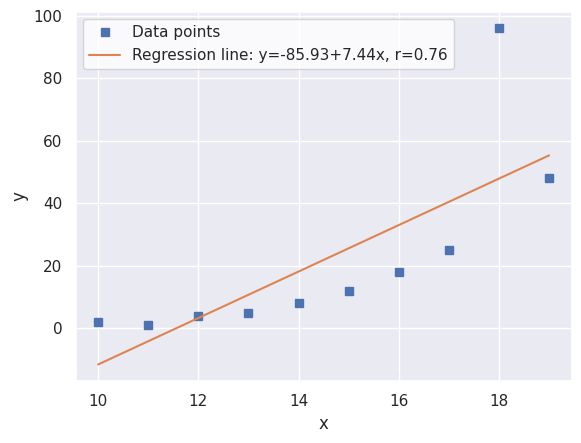

In [ ]:
import scipy.stats # Nos permite calcular los datos la regresión lineal de dos
# arreglos de igual dimensión, como la pendiente, punto de intersección con el
# origen, etc.
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])#arreglo de y
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])#arreglo de z
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                 [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                 [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'#pendiente

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')#le doy color a la leyenda
plt.show()


## Visualizaciones más avanzadas con Seaborn
Seaborn es una biblioteca para hacer gráficos estadísticos. Se basa en matplotlib y se integra estrechamente con las estructuras de datos de pandas.

Seaborn nos ayuda a explorar y comprender los datos. Sus funciones de trazado operan en DataFrames y matrices que contienen conjuntos de datos completos y realizan internamente el mapeo semántico y la agregación estadística necesarios para producir gráficos informativos. Su API declarativa orientada a conjuntos de datos nos permite enfocarnos en lo que significan los diferentes elementos de nuestros gráficos, en lugar de los detalles de cómo dibujarlos.

Aquí hay un ejemplo de lo que Seaborn puede hacer:

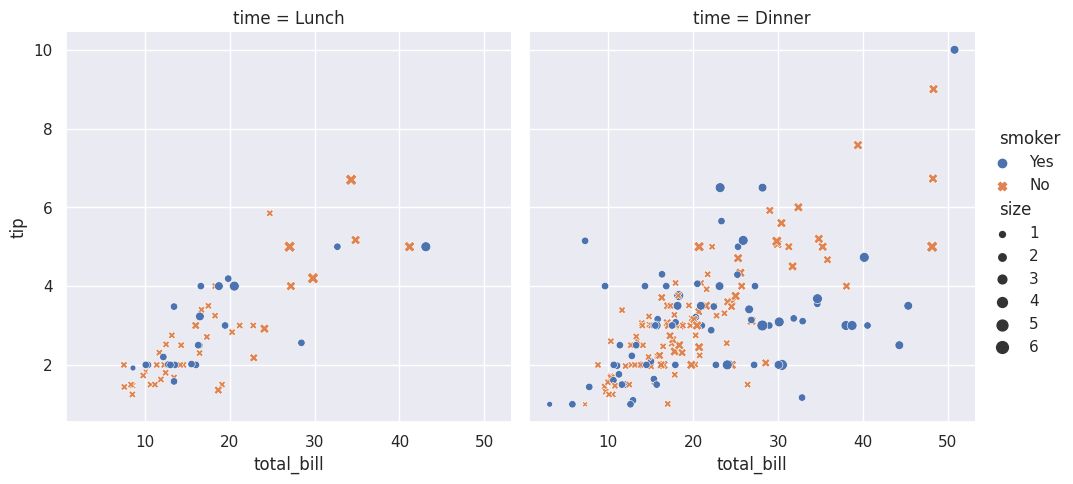

In [ ]:
# Importamos seaborn (es importante que las series tengan el mismo tamaño)
import seaborn as sns#Me permite abstraer mas cosas que con matplotlib podemos identificarla

# Aplicamos el tema por defecto
sns.set_theme()

# Cargamos un conjunto de datos por defecto
tips = sns.load_dataset("tips")

# Creamos la visualización
sns.relplot(
    data=tips, # El conjunto de datos
    x="total_bill", # Los valores del eje x )nombre de la columa del eje x
    y="tip", # Los valores dej eje Y (nomre de la columna del eje y)
    col="time", # Nos permite graficar distintos subconjuntos de nuestro
    # conjunto de datos
    hue="smoker", # Variables que define el color de los puntos
    style="smoker", # Variable que define el símbolo de cada punto
    size="size", # Variable que define el tamaño del punto
    # https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
)

No existe una forma universalmente mejor de visualizar datos. Las diferentes preguntas se responden mejor con diferentes tramas. Seaborn facilita el cambio entre diferentes representaciones visuales mediante el uso de una API coherente orientada a conjuntos de datos.

La función relplot() se llama así porque está diseñada para visualizar muchas relaciones estadísticas diferentes. Si bien los diagramas de dispersión suelen ser efectivos, las relaciones en las que una variable representa una medida de tiempo se representan mejor con una línea. La función relplot() tiene un parámetro de tipo conveniente que le permite cambiar fácilmente a esta representación alternativa:


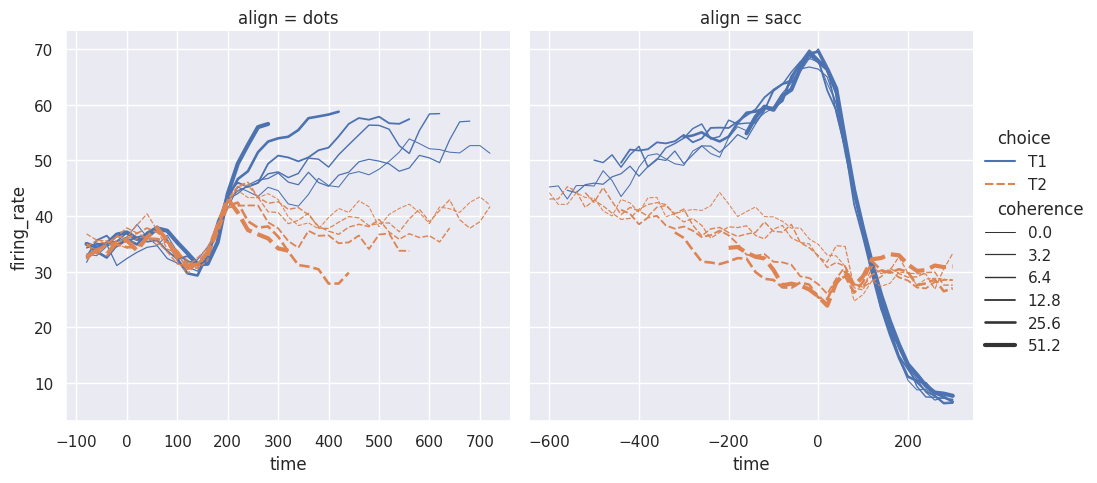

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots,
    kind="line", # Tipo de plot a dibujar
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False), # Nos permite pasar opciones al componente que
    # por debajo crea el plano donde se dibuja (esto comparte el eje x a distintas varibales)
)

Observemos cómo se utilizan los parámetros de `size` y `style` en los gráficos de dispersión y de líneas, pero afectan a las dos visualizaciones de manera diferente: cambian el área del marcador y el símbolo en el gráfico de dispersión frente al ancho de línea y la línea discontinua en el gráfico de líneas. No necesitábamos tener en cuenta esos detalles, permitiéndonos centrarnos en la estructura general de la trama y la información que queremos que transmita.

### Estimación estadística
A menudo, estamos interesados en el valor promedio de una variable en función de otras variables. Muchas funciones de `seaborn` realizarán automáticamente la estimación estadística necesaria para responder a estas preguntas:

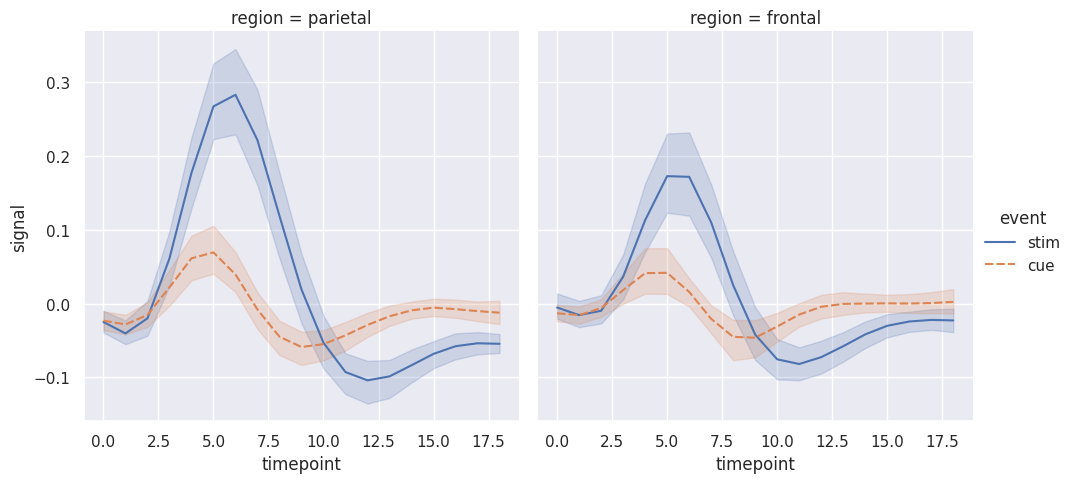

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region", #le damos el estilo a cada una de las variables
    hue="event", style="event",
)

Cuando se estiman los valores estadísticos, Seaborn utiliza bootstrapping para calcular los intervalos de confianza y dibujar barras de error que representan la incertidumbre de la estimación.

La estimación estadística en seaborn va más allá de las estadísticas descriptivas. Por ejemplo, es posible mejorar un diagrama de dispersión al incluir un modelo de regresión lineal (y su incertidumbre) usando lmplot():

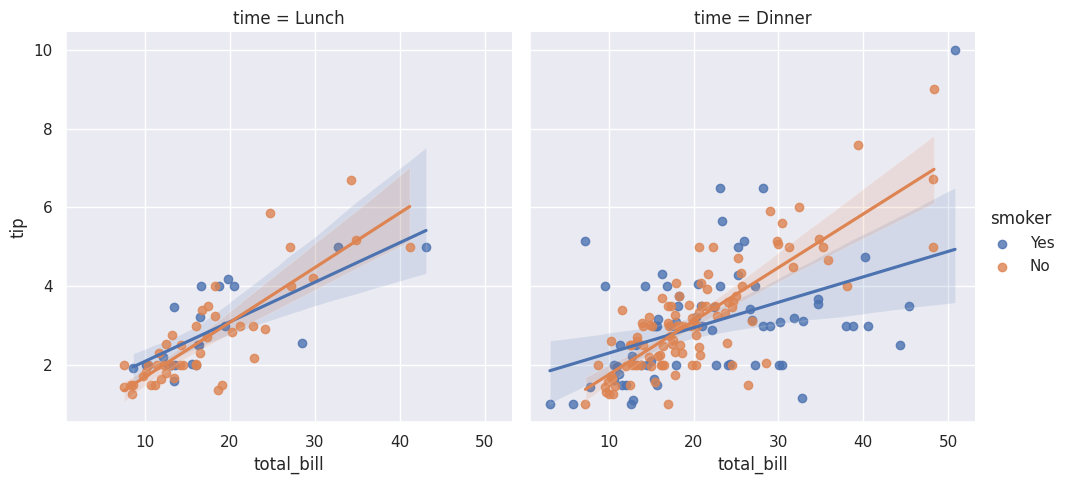

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### Representaciones distributivas
Los análisis estadísticos requieren conocimiento sobre la distribución de variables en su conjunto de datos. La función seaborn displot() admite varios enfoques para visualizar distribuciones. Estos incluyen técnicas clásicas como histogramas y enfoques computacionalmente intensivos como la estimación de la densidad del kernel:

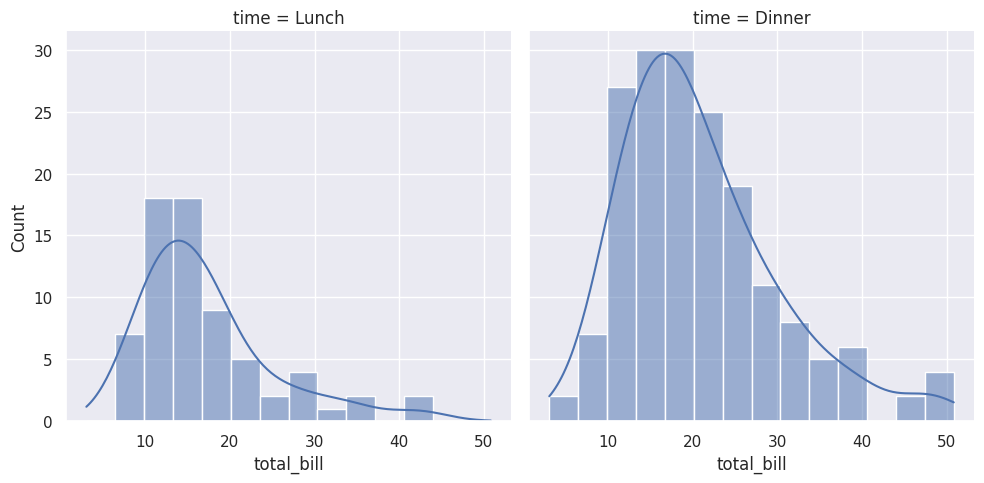

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn también trata de promover técnicas que son poderosas pero menos familiares, como calcular y trazar la función de distribución acumulativa empírica de los datos:

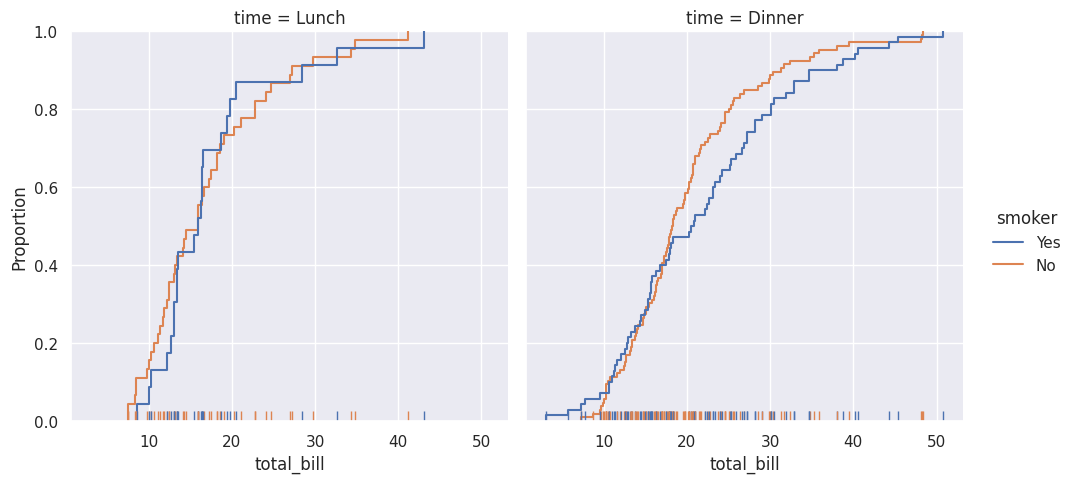

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

### Gráficos para datos categóricos
Varios tipos de gráficos especializados en seaborn están orientados hacia la visualización de datos categóricos. Se puede acceder a ellos a través de `catplot()`. Estas plots ofrecen diferentes niveles de granularidad. En el nivel más fino, es posible que desee ver cada observación dibujando un diagrama de "enjambre": un diagrama de dispersión que ajusta las posiciones de los puntos a lo largo del eje categórico para que no se superpongan:

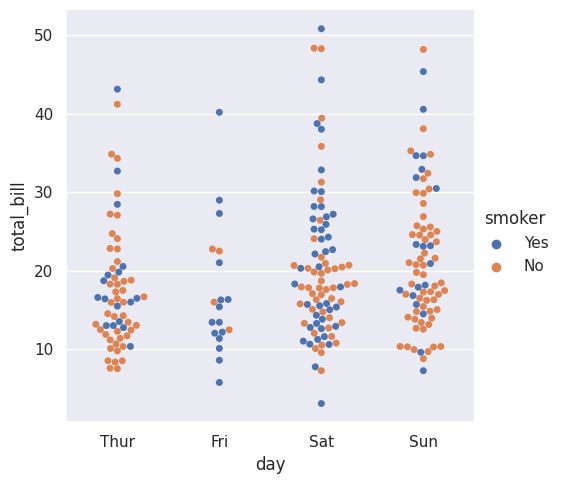

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Alternativamente, puede usar la estimación de la densidad del núcleo para representar la distribución subyacente de la que se muestrean los puntos:

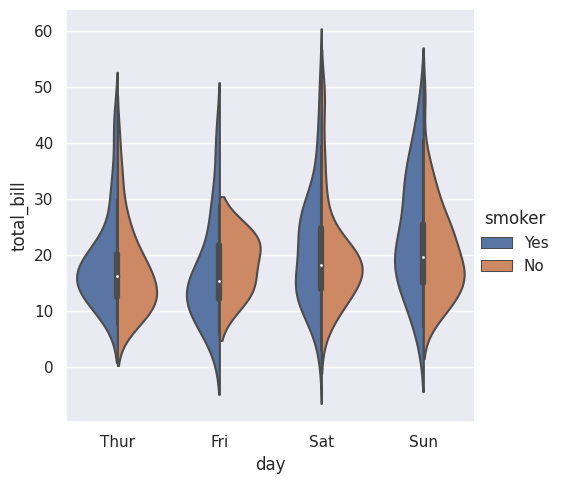

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

O podríamos mostrar solo el valor medio y su intervalo de confianza dentro de cada categoría anidada:

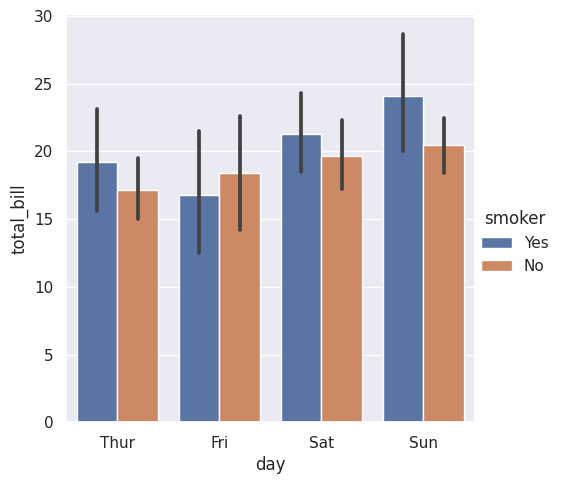

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## Distribuciones de datos
Una distribución de datos es una representación o descripción que muestra cómo los valores de una variable o conjunto de datos se distribuyen en todo el rango de posibles valores.

Quizás la forma más común para visualizar una distribución es el histograma. Este es el enfoque predeterminado en `displot()`, que usa el mismo código subyacente que `histplot()`. Un histograma es un gráfico de barras en el que el eje que representa la variable de datos se divide en un conjunto de contenedores discretos y el recuento de observaciones que se encuentran dentro de cada contenedor se muestra usando la altura de la barra correspondiente:

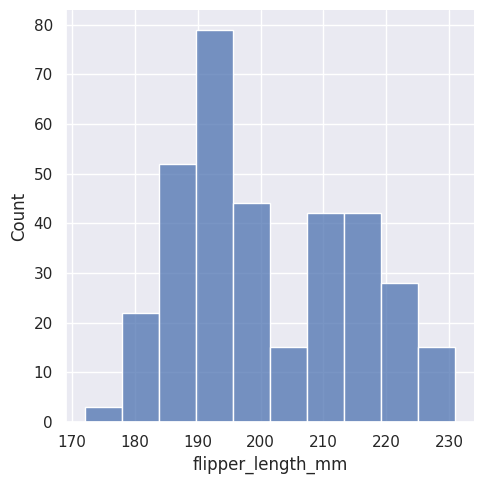

In [ ]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

## Bibliografía

Pandas Getting Started

https://realpython.com/numpy-scipy-pandas-correlation-python/

An introduction to seaborn

https://seaborn.pydata.org/tutorial/introduction.html#distributional-representations

Visualizing distributions of data

https://seaborn.pydata.org/tutorial/distributions.html